In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.images[2]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [9]:
mnist.train.images[2].shape

(784,)

In [10]:
# Reshape to original size to view
mnist.train.images[2].reshape(28, 28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [11]:
sample = mnist.train.images[2].reshape(28, 28)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

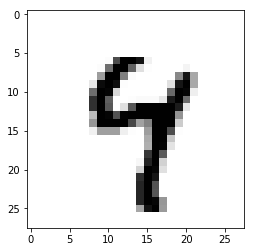

In [18]:
# To visualze with matplotlib
plt.imshow(sample, cmap='Greys')

In [38]:
# Hyperparameters
learning_rate = 0.001
epochs = 1
batch_size = 100

In [39]:
num_classes = 10
num_samples = mnist.train.num_examples

In [40]:
num_input = 784

In [41]:
num_hidden_1 = 256
num_hidden_2 = 256

In [42]:
def multilayer_perceptron(x, weights, biases):
    '''
     x : Placeholder for Data Input
     weights : Dict of weights
     biases : Dict of bias values
    '''
    
    # First hidden layer with RELU activation
    # X * W + b
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Activation(X * W + b), where Activation = RELU() -> Max
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last output layer
    output_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return output_layer

In [43]:
weights = {
    'h1' : tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_hidden_2, num_classes]))
}

In [44]:
weights

{'h1': <tensorflow.python.ops.variables.Variable at 0x12c284208>,
 'h2': <tensorflow.python.ops.variables.Variable at 0x12c2842b0>,
 'out': <tensorflow.python.ops.variables.Variable at 0x12c2ae4a8>}

In [45]:
biases = {
    'b1' : tf.Variable(tf.random_normal([num_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([num_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [46]:
# Shape of input
x = tf.placeholder('float', [None, num_input])
y = tf.placeholder('float', [None, num_classes])

In [47]:
pred = multilayer_perceptron(x, weights, biases)

In [50]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# Train

In [60]:
t = mnist.train.next_batch(1)

In [61]:
t

(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.

In [62]:
len(t)

2

In [63]:
xSamp, ySamp = t

In [64]:
xSamp.shape

(1, 784)

In [65]:
ySamp.shape

(1, 10)

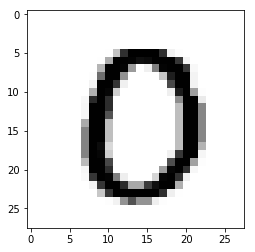

In [66]:
plt.imshow(xSamp.reshape(28,28), cmap="Greys")

In [68]:
ySamp

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# Run session

In [69]:
sess = tf.InteractiveSession()

In [71]:
init = tf.global_variables_initializer()

In [72]:
sess.run(init)

In [76]:
for anEpoch in range(epochs):
    
    average_cost = 0.0
    
    total_batch = int(num_samples / batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict = { x : batch_x , y : batch_y})
        
        average_cost += c / total_batch
        
    print("Epoch is {}, cost{:.4f}".format(anEpoch + 1, average_cost))
    
print("Model has completed training with Epochs {}".format(epochs))

Epoch is 1, cost165.5859
Model has completed training with Epochs 1


# Model Evaluation


In [78]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [79]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [80]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [81]:
accuracy = tf.reduce_mean(correct_predictions)

In [82]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [83]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [84]:
accuracy.eval({ x : mnist.test.images, y : mnist.test.labels})

0.8585